In [1]:
import pandas, numpy

# Initializes data
data = pandas.read_csv('imaqtpie.csv').drop('Unnamed: 0', 1)
stop = open("stop-word-list.txt").read().splitlines()
data = data[data.message.notnull()]

In [2]:
# Cleans message data into a bag of words
messages = data.message.str.lower()
for p in ".,!?:;\"'-~|[]()/\\\n":
    messages = messages.str.replace(p,' ')
messages = messages.str.split()
data['words'] = messages.apply(lambda x: [w for w in x if w.isalpha() and w not in stop])
data['len'] = data.words.apply(len)
print('Number of messages: ' + str(len(data)))
print('Maximum number of words: ' + str(data.len.max()))
print('Minimum number of words: ' + str(data.len.min()))
print('Average number of words: ' + str(data.len.mean()))
print('Fewest words message: ' + data.message.loc[data.len.argmin()])
print('Most words message: ' + data.message.loc[data.len.argmax()])

Number of messages: 44037
Maximum number of words: 61
Minimum number of words: 0
Average number of words: 2.8554624520289758
Fewest words message: !WHEN
Most words message: EleGiggle WIN LANE EleGiggle LOSE GAME EleGiggle WIN LANE EleGiggle LOSE GAME EleGiggle WIN LANE EleGiggle LOSE GAME EleGiggle WIN LANE EleGiggle LOSE GAME EleGiggle WIN LANE EleGiggle LOSE GAME EleGiggle WIN LANE EleGiggle LOSE GAME EleGiggle WIN LANE EleGiggle LOSE GAME EleGiggle WIN LANE EleGiggle LOSE GAME EleGiggle WIN LANE EleGiggle LOSE GAME EleGiggle WIN LANE EleGiggle LOSE GAME EleGiggle


In [3]:
# Sentiment Analysis
pos = open('positive.txt').read().splitlines()
neg = open('negative.txt').read().splitlines()

data['pos'] = [len([w for w in t if w in pos]) for t in data.words]
data['neg'] = [len([w for w in t if w in neg]) for t in data.words]
data['comb'] = data.pos - data.neg

In [4]:
import datetime
data['minute'] = [datetime.datetime.fromtimestamp(x/1000.).strftime('%m/%d %H:%M') for x in data.timestamp]

04/30 08:24
pos     0.865922
neg     0.027933
comb    0.837989
Name: 04/30 08:24, dtype: float64
04/30 12:45
pos     0.051064
neg     0.293617
comb   -0.242553
Name: 04/30 12:45, dtype: float64


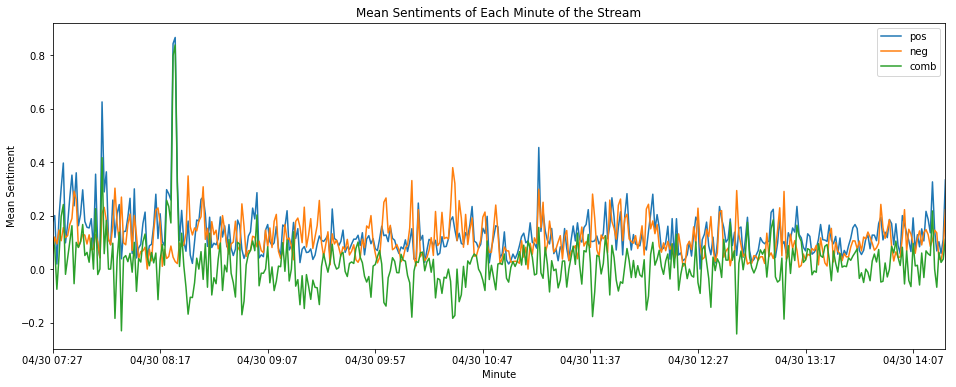

In [5]:
# Time series visualization of sentiment analysis
g = data.groupby('minute')
gt = g.mean().loc[:,['pos','neg','comb']]

print(gt.comb.argmax())
print(gt.loc[gt.comb.argmax()])

print(gt.comb.argmin())
print(gt.loc[gt.comb.argmin()])

%matplotlib inline
ax = gt.plot()
ax.set_title('Mean Sentiments of Each Minute of the Stream')
ax.set_xlabel('Minute')
ax.set_ylabel('Mean Sentiment')
ax.figure.set_size_inches(16, 6, forward=True)

In [6]:
# The most positive minutes
gt[gt.comb > 0.3]

,pos,neg,comb
minute,,,
04/30 07:50,0.625000,0.208333,0.416667
04/30 08:23,0.842697,0.044944,0.797753
04/30 08:24,0.865922,0.027933,0.837989
04/30 08:25,0.326446,0.020661,0.305785


In [7]:
# The most negative minutes
gt[gt.comb < -0.3]

,pos,neg,comb
minute,,,


In [8]:
# Sentiment Analysis on emotes
posemotes = open('positiveemotes.txt').read().splitlines()
negemotes = open('negativeemotes.txt').read().splitlines()

data['posemotes'] = [len([w for w in t if w in posemotes]) for t in data.words]
data['negemotes'] = [len([w for w in t if w in negemotes]) for t in data.words]
data['combemotes'] = data.posemotes - data.negemotes

04/30 12:39
posemotes     1.077778
negemotes     0.022222
combemotes    1.055556
Name: 04/30 12:39, dtype: float64
04/30 11:22
posemotes     0.117188
negemotes     0.671875
combemotes   -0.554688
Name: 04/30 11:22, dtype: float64


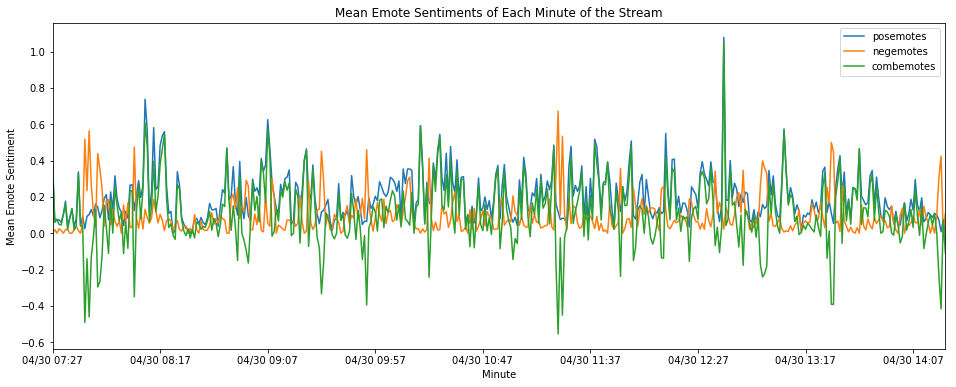

In [9]:
# Time series visualization of emote sentiment analysis
g = data.groupby('minute')
gtemotes = g.mean().loc[:,['posemotes','negemotes','combemotes']]

print(gtemotes.combemotes.argmax())
print(gtemotes.loc[gtemotes.combemotes.argmax()])

print(gtemotes.combemotes.argmin())
print(gtemotes.loc[gtemotes.combemotes.argmin()])

ax = gtemotes.plot()
ax.set_title('Mean Emote Sentiments of Each Minute of the Stream')
ax.set_xlabel('Minute')
ax.set_ylabel('Mean Emote Sentiment')
ax.figure.set_size_inches(16, 6, forward=True)

In [10]:
# The most positive minutes
gtemotes[gtemotes.combemotes > 0.3]

,posemotes,negemotes,combemotes
minute,,,
04/30 07:27,0.382353,0.000000,0.382353
04/30 07:39,0.337838,0.013514,0.324324
04/30 08:10,0.737705,0.131148,0.606557
04/30 08:11,0.565217,0.086957,0.478261
04/30 08:14,0.581395,0.186047,0.395349
04/30 08:17,0.482759,0.103448,0.379310
04/30 08:18,0.536082,0.072165,0.463918
04/30 08:19,0.558824,0.014706,0.544118
04/30 08:48,0.468750,0.000000,0.468750


In [11]:
# The most negative minutes
gtemotes[gtemotes.combemotes < -0.3]

,posemotes,negemotes,combemotes
minute,,,
04/30 07:42,0.025424,0.516949,-0.491525
04/30 07:44,0.102564,0.564103,-0.461538
04/30 08:05,0.125000,0.475000,-0.350000
04/30 09:32,0.117647,0.450980,-0.333333
04/30 09:53,0.064516,0.459677,-0.395161
04/30 11:22,0.117188,0.671875,-0.554688
04/30 11:24,0.082707,0.533835,-0.451128
04/30 13:29,0.108696,0.500000,-0.391304
04/30 13:30,0.054054,0.445946,-0.391892


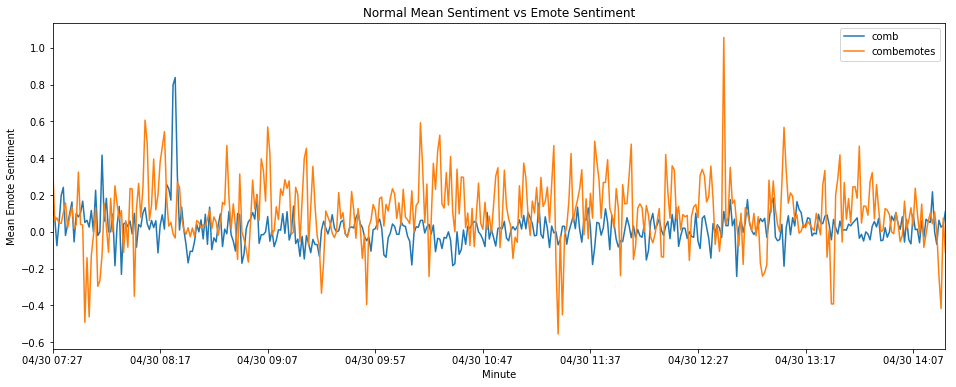

In [12]:
# Plot of normal lexicon sentiment analysis and emote analysis
gtt = pandas.concat([gt.loc[:,['comb']], gtemotes.loc[:,['combemotes']]], axis=1)
ax = gtt.plot()

ax.set_title('Normal Mean Sentiment vs Emote Sentiment')
ax.set_xlabel('Minute')
ax.set_ylabel('Mean Emote Sentiment')
ax.figure.set_size_inches(16, 6, forward=True)

In [13]:
# Computes Pearson correlation between sentiment analysis and emote analysis
combmean = gtt.comb.mean()
combemotesmean = gtt.combemotes.mean()
r = sum((gtt.comb - combmean) * (gtt.combemotes - combemotesmean))/(numpy.sqrt(sum((gtt.comb - combmean)**2)) * numpy.sqrt(sum((gtt.combemotes - combemotesmean)**2)))
r

-0.030186594007190898

In [14]:
subsonly = data[data.subscriber]

04/30 08:23
pos     1.16
neg     0.04
comb    1.12
Name: 04/30 08:23, dtype: float64
04/30 10:34
pos     0.272727
neg     1.454545
comb   -1.181818
Name: 04/30 10:34, dtype: float64


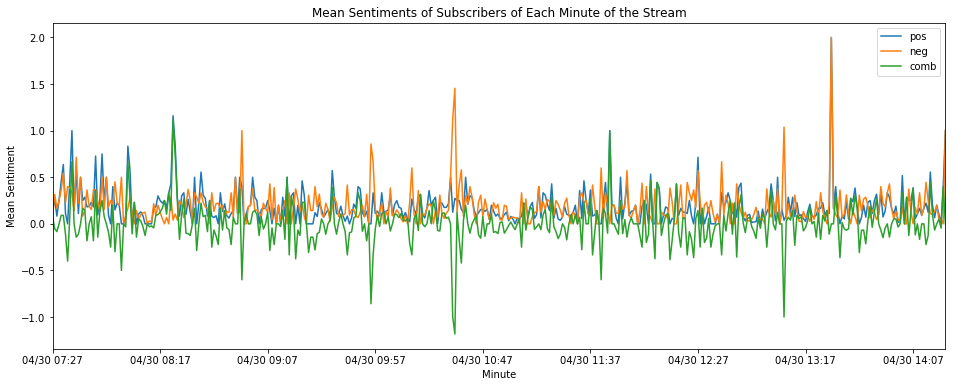

In [15]:
# Time series visualization of sentiment analysis on subscribers
gsubs = subsonly.groupby('minute')
gtsubs = gsubs.mean().loc[:,['pos','neg','comb']]

print(gtsubs.comb.argmax())
print(gtsubs.loc[gtsubs.comb.argmax()])

print(gtsubs.comb.argmin())
print(gtsubs.loc[gtsubs.comb.argmin()])

%matplotlib inline
ax = gtsubs.plot()
ax.set_title('Mean Sentiments of Subscribers of Each Minute of the Stream')
ax.set_xlabel('Minute')
ax.set_ylabel('Mean Sentiment')
ax.figure.set_size_inches(16, 6, forward=True)

In [25]:
data.loc[data.minute == '04/30 12:45'].message

33024                                  Lycantt so true lol
33025                                                kalec
33026                                        TANK CAIT LUL
33027                                                  LUL
33028                                                  LOL
33029                                                  lol
33030                                                  LUL
33031                      LUL WOW THAT ACTUALLY KILLED ME
33032                                       fist gachiBASS
33033              @Imaqtpie Qt wants a cheese pizza Kappa
33035                                              JENSSEN
33036    qtpTILT qtpTILT qtpTILT qtpTILT qtpTILT qtpTIL...
33037                                             TANK LUL
33038                                                  LUL
33039                                          GIANTS BELT
33040    PLAT 1 account looking for smurf, willing to t...
33041                                                  L